In [78]:
import pandas as pd
import numpy as np 
from numpy import array
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D,Embedding
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,LSTM,GRU
from keras.layers import Activation, Dropout,BatchNormalization
from keras import optimizers
from keras import applications
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import math 
import datetime
import time
import tensorflow as tf
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import requests,io,random,re

"vectorization" the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. 

CountVectorizer implements both tokenization and occurrence counting in a single class:



In [2]:
from sklearn.feature_extraction.text import CountVectorizer

/home/heroo/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [3]:
corpus = [
...     'This is the first document.',
...     'This is the second second document.',
...     'And the third one.',
...     'Is this the first document?',
... ]

In [4]:
vectorizer = CountVectorizer()
vectorizer


CountVectorizer()

In [5]:
X=vectorizer.fit_transform(corpus)

X

In [8]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

The converse mapping from feature name to column index is stored in the vocabulary_ attribute of the vectorizer:



In [10]:
vectorizer.vocabulary_.get('first')

2

 To preserve some of the local ordering information we can extract 2-grams of words in addition to the 1-grams (individual words):

In [12]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                     token_pattern=r'\b\w+\b', min_df=1)

In [13]:
 X_2 = bigram_vectorizer.fit_transform(corpus).toarray()

In [14]:
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

In [17]:
feature_index = bigram_vectorizer.vocabulary_.get('this is')
X_2[:, feature_index]

array([1, 1, 0, 0])

for large dataset

In [18]:
counts = [[3, 0, 1],
...           [2, 0, 0],
...           [3, 0, 0],
...           [4, 0, 0],
...           [3, 2, 0],
...           [3, 0, 2]]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit_transform(corpus).toarray()

array([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674],
       [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
        0.85322574, 0.22262429, 0.        , 0.27230147],
       [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
        0.        , 0.28847675, 0.55280532, 0.        ],
       [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
        0.        , 0.35872874, 0.        , 0.43877674]])

In [20]:
vectorizer

TfidfVectorizer()

In [22]:
messages = ["Hey hey hey lets go get lunch today :)",
           "Did you go home?",
           "Hey!!! I need a favor"]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vect=CountVectorizer()

In [25]:
vect.fit(messages)

CountVectorizer()

In [27]:
vect.get_feature_names()

['did',
 'favor',
 'get',
 'go',
 'hey',
 'home',
 'lets',
 'lunch',
 'need',
 'today',
 'you']

There’s a few things to note here.

Everything is lowercase
Words less than two letters have not been included (notice there is no 'a')
Punctuation has been removed
There are no duplicates


In [28]:
ch=vect.transform(messages)
ch

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [29]:
print(ch)

  (0, 2)	1
  (0, 3)	1
  (0, 4)	3
  (0, 6)	1
  (0, 7)	1
  (0, 9)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (1, 10)	1
  (2, 1)	1
  (2, 4)	1
  (2, 8)	1


In [32]:
import pandas as pd
pd.DataFrame(ch.toarray(),columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,3,0,1,1,0,1,0
1,1,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,1,0,0


In [33]:
new_message = ['Hey lets go get a drink tonight']
xx=vect.transform(new_message)

In [34]:
xx

<1x11 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [35]:
pd.DataFrame(xx.toarray(),columns=vect.get_feature_names())

,did,favor,get,go,hey,home,lets,lunch,need,today,you
0,0,0,1,1,1,0,1,0,0,0,0


In [39]:
messages.append(new_message[0])

In [40]:
messages

['Hey hey hey lets go get lunch today :)',
 'Did you go home?',
 'Hey!!! I need a favor',
 'Hey lets go get a drink tonight']

In [42]:
x=vect.fit_transform(messages)

In [44]:
pd.DataFrame(x.toarray(),columns=vect.get_feature_names())

,did,drink,favor,get,go,hey,home,lets,lunch,need,today,tonight,you
0,0,0,0,1,1,3,0,1,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,0,1,0,0,0
3,0,1,0,1,1,1,0,1,0,0,0,1,0


In [45]:
# creating DTMs
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# creating and training logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_predicted = logreg.predict(X_test_dtm)  # predicting

NameError: name 'X_train' is not defined

TfidfVectorizer
An alternative to CountVectorizer is something called TfidfVectorizer.

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
def createDTM(messages):
    vect = TfidfVectorizer()
    dtm = vect.fit_transform(messages) # create DTM
    
    # create pandas dataframe of DTM
    return pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names()) 

In [47]:
messages = ["Hey lets get lunch :)",
           "Hey!!! I need a favor"]
createDTM(messages)

,favor,get,hey,lets,lunch,need
0,0.000000,0.534046,0.379978,0.534046,0.534046,0.000000
1,0.631667,0.000000,0.449436,0.000000,0.000000,0.631667


In [10]:
sudo install https://github.com/paoloripamonti/word2vec-keras


SyntaxError: invalid syntax (<ipython-input-10-02329dfff1f9>, line 1)

In [5]:
sudo install git+https://github.com/paoloripamonti/word2vec-keras

from word2vec_keras import Word2VecKeras

model = Word2VecKeras()

model.train(x_train, y_train)

SyntaxError: invalid syntax (<ipython-input-5-0fcb60d4c686>, line 1)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)


In [14]:
import sys
import os
import ssl
import random
import cv2 
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context
titanic = sns.load_dataset("titanic")


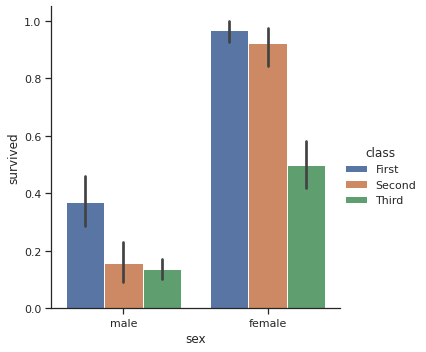

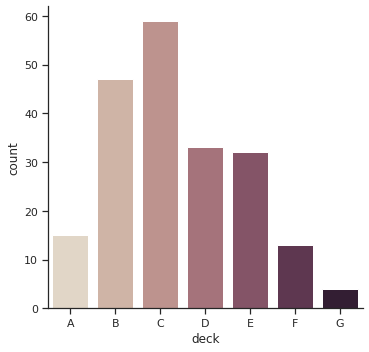

In [21]:

sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);


In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


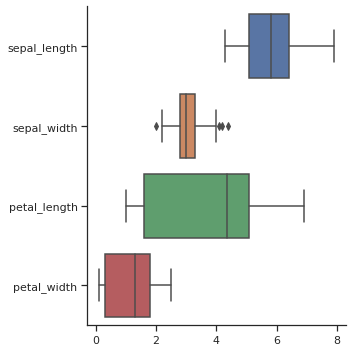

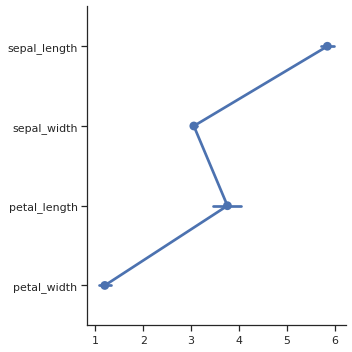

In [24]:
iris = sns.load_dataset("iris")
sns.catplot(data=iris, orient="h", kind="box");
sns.catplot(data=iris, orient="h", kind="point");

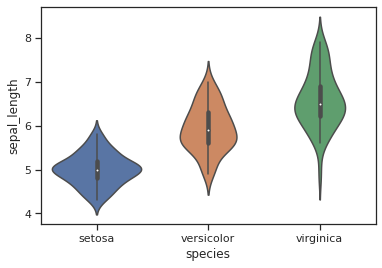

In [25]:
sns.violinplot(x=iris.species, y=iris.sepal_length);


https://seaborn.pydata.org/tutorial.html

https://plotly.com/python/